In [1]:
from pathlib import Path
import pickle
import logomaker
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import os

CURRENT_DIR = Path(os.getcwd())
figures_dir = CURRENT_DIR / "figures"
figures_dir.mkdir(exist_ok=True)

In [ ]:
path_preds = CURRENT_DIR / "folds_augmented/idx_added_per_threshold_fold_class.pickle"
with open(path_preds, "rb") as f:
    idx_added_per_threshold_fold_class = pickle.load(f)

In [5]:
for key, experiment in idx_added_per_threshold_fold_class.items():
    for fold, values in experiment.items():
        for class_, idxs in values.items():
            print(f"{key} {fold} {class_} {len(idxs)}")

(0.5, 0.0) 1 4 1283
(0.5, 0.0) 1 3 333
(0.5, 0.0) 1 1 2131
(0.5, 0.0) 2 4 1523
(0.5, 0.0) 2 3 387
(0.5, 0.0) 2 2 48
(0.5, 0.0) 2 1 2114
(0.5, 0.0) 3 4 1322
(0.5, 0.0) 3 3 384
(0.5, 0.0) 3 2 13
(0.5, 0.0) 3 1 2210
(0.5, 0.0) 4 4 1547
(0.5, 0.0) 4 3 377
(0.5, 0.0) 4 2 21
(0.5, 0.0) 4 1 2418
(0.5, 0.0) 5 4 3196
(0.5, 0.0) 5 3 1362
(0.5, 0.0) 5 2 29
(0.5, 0.0) 5 1 4473
(0.6, 0.0) 1 4 4472
(0.6, 0.0) 1 3 4472
(0.6, 0.0) 1 2 4472
(0.6, 0.0) 1 1 4472
(0.6, 0.0) 2 4 4472
(0.6, 0.0) 2 3 4472
(0.6, 0.0) 2 2 4472
(0.6, 0.0) 2 1 4472
(0.6, 0.0) 3 4 4472
(0.6, 0.0) 3 3 4436
(0.6, 0.0) 3 2 4472
(0.6, 0.0) 3 1 4472
(0.6, 0.0) 4 4 4472
(0.6, 0.0) 4 3 4472
(0.6, 0.0) 4 2 4472
(0.6, 0.0) 4 1 4472
(0.6, 0.0) 5 4 4473
(0.6, 0.0) 5 3 4473
(0.6, 0.0) 5 2 4473
(0.6, 0.0) 5 1 4473
(0.7, 0.0) 1 4 4472
(0.7, 0.0) 1 3 4472
(0.7, 0.0) 1 2 4472
(0.7, 0.0) 1 1 4472
(0.7, 0.0) 2 4 4472
(0.7, 0.0) 2 3 4472
(0.7, 0.0) 2 2 4472
(0.7, 0.0) 2 1 4472
(0.7, 0.0) 3 4 4472
(0.7, 0.0) 3 3 4472
(0.7, 0.0) 3 2 4472
(0.7, 0.0) 3

In [6]:
trial = np.array([list(x[22:32]) for x in idx_added_per_threshold_fold_class[(0.9, 0.0)][5][2]])
map_ = {"A":[1, 0, 0, 0],
        "C":[0, 1, 0, 0],
        "G":[0, 0, 1, 0],
        "T":[0, 0, 0, 1],
        "P":[0, 0, 0, 0],}

one_hot = np.array([[map_[nucleotide] for nucleotide in seq] for seq in trial])
pwm = np.sum(one_hot, axis=0) / np.sum(np.sum(one_hot, axis=0), axis=1, keepdims=True)
pwm = 1e-6 + pwm /  np.sum(pwm+1e-6, axis=1, keepdims=True)
info_df = logomaker.transform_matrix(pd.DataFrame(pwm, columns=list("ACGU")),
                                from_type='probability',
                                to_type='information')

In [21]:
path = CURRENT_DIR / "folds_augmented_final_hard/idx_added_per_threshold_fold_class.pickle"
with open(path, "rb") as f:
    idx_added_per_threshold_fold_class = pickle.load(f)

idx_added = dict(idx_added_per_threshold_fold_class[(1.0, 0.0)])

In [22]:
for key, val in idx_added.items():
    print(f"{key} {len(val)}")

4 26310
3 26310
2 26310
1 26310


In [23]:
#new train and val
path_train = CURRENT_DIR / "folds_augmented_final_hard/upper_bound_1.0_lower_bound_0.0/train_final_augmented_hard.pickle"
with open(path_train, "rb") as f:
    train_data = pickle.load(f)
path_val = CURRENT_DIR / "folds_augmented_final_hard/upper_bound_1.0_lower_bound_0.0/val_final_augmented_hard.pickle"
with open(path_val, "rb") as f:
    val_data = pickle.load(f)

In [24]:
print("Train")
for key, val in train_data.items():
    print(f"{key} {len(val)}")
print("Validation")
for key, val in val_data.items():
    print(f"{key} {len(val)}")

Train
type_1 12898
type_2 7826
type_3 573
type_4 1067
negative 111792
Validation
type_1 2276
type_2 1381
type_3 101
type_4 188
negative 19758


In [2]:
path_ = CURRENT_DIR / "results_first_training"
path_averages = path_ / "averages.json"
path_results = path_ / "results.json"
with open(path_averages, "r") as f:
    averages_0 = json.load(f)
with open(path_results, "r") as f:
    results_0 = json.load(f)
path_ = CURRENT_DIR / "results_augmented_training"
averages_paths = sorted([x / "averages.json" for x in path_.iterdir()])
results_paths = sorted([x / "results.json" for x in path_.iterdir()])
list_ = [averages_0]
list_results = [results_0]
for averages_path in averages_paths:
    with open(averages_path, "r") as f:
        averages = json.load(f)
    list_.append(averages)
for results_path in results_paths:
    with open(results_path, "r") as f:
        results = json.load(f)
    list_results.append(results)

averages_df = pd.DataFrame(list_)
results_df = pd.DataFrame(list_results)
std_df = results_df.map(lambda x: np.std(x, ddof=4) if isinstance(x, list) else x)

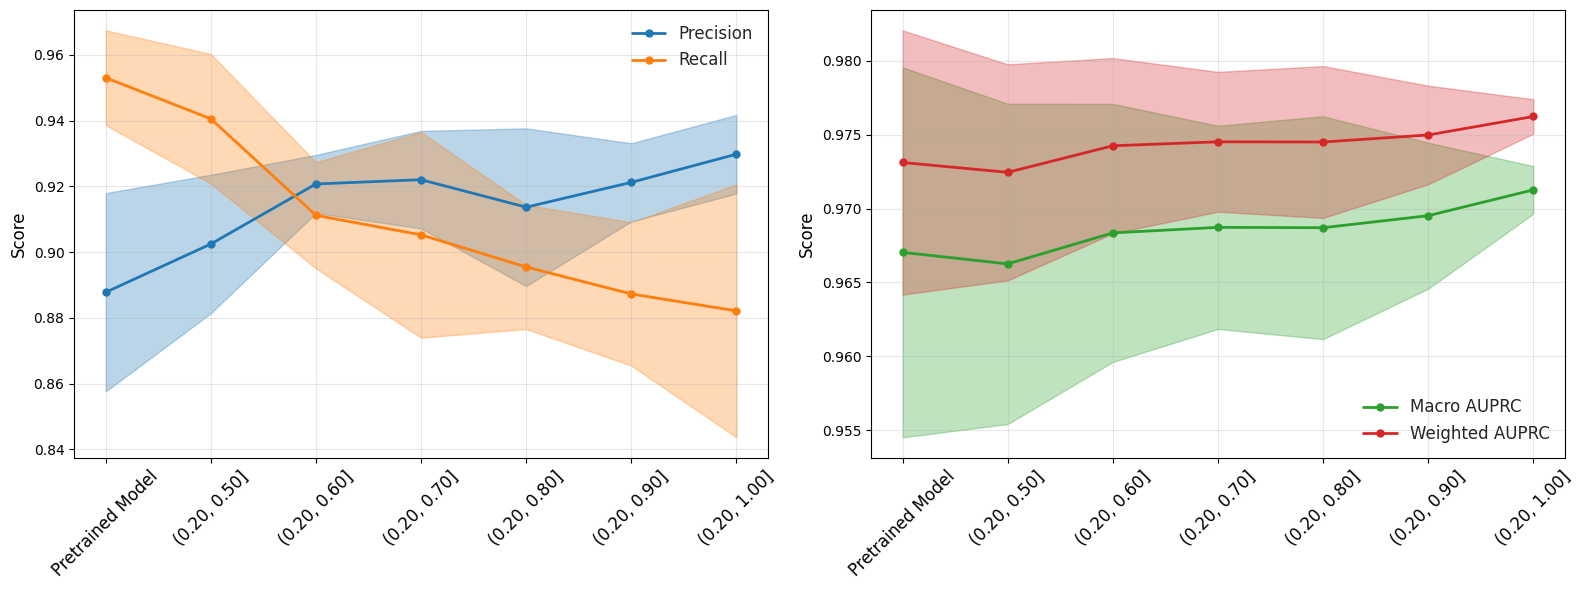

In [3]:
# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=False)
plt.style.use('seaborn-v0_8-whitegrid')

# X values and labels
x = averages_df.index
x_labels = ["Pretrained Model", "(0.20, 0.50]", "(0.20, 0.60]", "(0.20, 0.70]", 
           "(0.20, 0.80]", "(0.20, 0.90]", "(0.20, 1.00]"]

# --- Left plot: Precision and Recall ---
ax1.plot(x, averages_df["val_precision"], 'o-', color='#1f77b4', 
         label='Precision', linewidth=2, markersize=5)
ax1.fill_between(x, 
                averages_df["val_precision"] - std_df["val_precision"], 
                averages_df["val_precision"] + std_df["val_precision"],
                alpha=0.3, color='#1f77b4')

ax1.plot(x, averages_df["val_recall"], 'o-', color='#ff7f0e', 
         label='Recall', linewidth=2, markersize=5)
ax1.fill_between(x, 
                averages_df["val_recall"] - std_df["val_recall"], 
                averages_df["val_recall"] + std_df["val_recall"],
                alpha=0.3, color='#ff7f0e')
                


ax1.set_ylabel('Score', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(x_labels, rotation=45, fontsize=12)
ax1.legend(loc='best', fontsize=12)
ax1.grid(True, alpha=0.3)

# --- Right plot: Both AUPRC metrics ---
ax2.plot(x, averages_df["val_auprc"], 'o-', color='#2ca02c', 
         label='Macro AUPRC', linewidth=2, markersize=5)
ax2.fill_between(x, 
                averages_df["val_auprc"] - std_df["val_auprc"],
                averages_df["val_auprc"] + std_df["val_auprc"],
                alpha=0.3, color='#2ca02c')

ax2.plot(x, averages_df["val_auprc_custom"], 'o-', color='#d62728', 
         label='Weighted AUPRC', linewidth=2, markersize=5)
ax2.fill_between(x, 
                averages_df["val_auprc_custom"] - std_df["val_auprc_custom"],
                averages_df["val_auprc_custom"] + std_df["val_auprc_custom"],
                alpha=0.3, color='#d62728')
                

ax2.set_ylabel('Score', fontsize=12)
ax2.set_xticks(x)
ax2.set_xticklabels(x_labels, rotation=45, fontsize=12)
ax2.legend(loc='best', fontsize=12)
ax2.grid(True, alpha=0.3)


fig.tight_layout()


plt.savefig(figures_dir / "hard_negative_performance.pdf", bbox_inches='tight')

In [8]:
averages_df

,epoch,val_loss,val_f1,val_precision,val_recall,val_auprc,val_auprc_custom,val_auroc,val_accuracy
0,37.4,0.172182,0.917051,0.887762,0.953047,0.967031,0.973116,0.992090,0.936303
1,12.0,0.188432,0.920293,0.902455,0.940548,0.966252,0.972448,0.991861,0.931049
2,13.2,0.209558,0.915235,0.920721,0.911189,0.968350,0.974247,0.992413,0.920833
3,9.4,0.208742,0.912643,0.922022,0.905226,0.968724,0.974516,0.992475,0.919583
4,7.2,0.224871,0.902530,0.913655,0.895462,0.968701,0.974503,0.992486,0.904981
5,11.6,0.225606,0.902189,0.921214,0.887257,0.969514,0.974978,0.992489,0.905608
6,12.6,0.231764,0.903372,0.929785,0.882100,0.971261,0.976229,0.992649,0.906571
